# 11 时间序列
时间戳：具体的时刻
固定的时间区间
时间间隔

## 11.1 日期和时间数据的类型及工具
Python标准库包含了日期和时间数据的类型
1 datetime
2 time
3 calendar

In [1]:
from datetime import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import pandas as pd

now = datetime.now()
now

datetime.datetime(2022, 5, 9, 11, 29, 29, 181423)

In [2]:
now.year, now.month, now.day

(2022, 5, 9)

In [3]:
# timedelta表示两个时间之差
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [4]:
delta.days

926

In [5]:
delta.seconds

56700

In [6]:
from datetime import timedelta

start = datetime(2022, 1, 1)
# 可以通过加上或减去一个timedelta或其整数倍来产生一个新的datetime
start + timedelta(12)

datetime.datetime(2022, 1, 13, 0, 0)

In [7]:
start - 2 * timedelta(12)

datetime.datetime(2021, 12, 8, 0, 0)

In [8]:
start.tzinfo

### 11.1.1 字符串与datetime互转

In [9]:
stamp = datetime(2022, 1, 1)
str(stamp)

'2022-01-01 00:00:00'

In [10]:
stamp.strftime('%Y-%m-%d')

'2022-01-01'

In [11]:
stamp.strftime('%Y-%m-%d %H:%M:%S')

'2022-01-01 00:00:00'

In [12]:
# 将字符串转化为datetime
value = '2022-01-01'
datetime.strptime(value, '%Y-%m-%d')

datetime.datetime(2022, 1, 1, 0, 0)

In [13]:
datestrs = ['2022-01-01', '2022-05-08']
[datetime.strptime(x, '%Y-%m-%d') for x in datestrs]

[datetime.datetime(2022, 1, 1, 0, 0), datetime.datetime(2022, 5, 8, 0, 0)]

In [14]:
# datetime.strptime将字符串转化为时间，需要传入指定的格式
# 每次传入比较麻烦，对于通用的日期，可以使用第三方库
from dateutil.parser import parse

parse('2022-01-01')

datetime.datetime(2022, 1, 1, 0, 0)

In [15]:
# dateutil能够解析大部分人类可理解的日期
parse('Mar 31, 2022 10:45 PM')

datetime.datetime(2022, 3, 31, 22, 45)

In [16]:
# 国际场合下，一般日期出现在月份之前，可以传递dayfirst=True
parse('Mar 31, 2022 10:45 PM', dayfirst=True)

datetime.datetime(2022, 3, 31, 22, 45)

In [17]:
parse('8/5/2022', dayfirst=True)

datetime.datetime(2022, 5, 8, 0, 0)

> dateutil.parse可能存在识别不准的情况

In [18]:
# to_datetime方法可以转换很多不同的日期表示格式
datestrs = ['2022-05-08 21:00:00', '2022-05-09 22:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2022-05-08 21:00:00', '2022-05-09 22:00:00'], dtype='datetime64[ns]', freq=None)

In [19]:
# pandas.to_datetime方法可以处理那些被认为缺失值的值
idx = pd.to_datetime(datestrs + [None])
idx
# NaT是pandas中时间吹数据的null值

DatetimeIndex(['2022-05-08 21:00:00', '2022-05-09 22:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

## 11.2 时间序列基础

In [20]:
from datetime import datetime

dates = [datetime(2022, 1, 1),
         datetime(2022, 2, 1),
         datetime(2022, 3, 1),
         datetime(2022, 4, 1),
         datetime(2022, 5, 1),
         datetime(2022, 6, 1), ]
# datetime对象可以被放入DatetimeIndex
ts = pd.Series(np.random.randn(6), index=dates)
ts

2022-01-01   -0.675214
2022-02-01    1.354869
2022-03-01    0.416618
2022-04-01   -0.668168
2022-05-01    0.574560
2022-06-01    0.722797
dtype: float64

In [21]:
ts.index

DatetimeIndex(['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01',
               '2022-05-01', '2022-06-01'],
              dtype='datetime64[ns]', freq=None)

In [22]:
ts.index.dtype

dtype('<M8[ns]')

In [23]:
# DatetimeIndex中的标量值是pandas的Timestamp对象
stamp = ts.index[0]
stamp

Timestamp('2022-01-01 00:00:00')

### 11.2.1 索引、选择、子集

In [24]:
stamp = ts.index[2]
# 可以通过值来索引出数据
ts[stamp]

0.4166178572160783

In [25]:
# 直接传入一个可解释的日期的字符串也可以
ts['2022/5/1']

0.574559731641775

In [26]:
# 对于时间序列，可以传递一个年份或者月份来获取数据的切片
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('2022/1/1', periods=1000))
longer_ts[:5]

2022-01-01    0.073769
2022-01-02   -0.637217
2022-01-03   -1.045233
2022-01-04    1.947781
2022-01-05   -0.374208
Freq: D, dtype: float64

In [27]:
# 传入年份，获取2022年的数据
longer_ts['2022'].head()

2022-01-01    0.073769
2022-01-02   -0.637217
2022-01-03   -1.045233
2022-01-04    1.947781
2022-01-05   -0.374208
Freq: D, dtype: float64

In [28]:
# 传入月份也可以
longer_ts['2022-05'].head()

2022-05-01    0.551964
2022-05-02    1.100962
2022-05-03   -0.250867
2022-05-04   -0.559415
2022-05-05    1.370925
Freq: D, dtype: float64

In [29]:
# 传入时间区间
longer_ts['2022/1/1':'2022/1/5']

2022-01-01    0.073769
2022-01-02   -0.637217
2022-01-03   -1.045233
2022-01-04    1.947781
2022-01-05   -0.374208
Freq: D, dtype: float64

> 在传入一个字符串的日期、datetime对象或时间戳，这种方式产生了一个原时间序列的试图。类似于Numpy的数组。这意味着没有数据被复制，并且在切片上的修改会反映在原始数据上。

In [30]:
# truncate可以在两个日期对Series进行切片
ts.truncate(before='2022/1/5')

2022-02-01    1.354869
2022-03-01    0.416618
2022-04-01   -0.668168
2022-05-01    0.574560
2022-06-01    0.722797
dtype: float64

In [31]:
# 在DataFrame操作同样适用
dates = pd.date_range('1/1/2022', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=list('ABCD'))
long_df

,A,B,C,D
2022-01-05,-0.486137,-0.446388,0.773388,1.484344
2022-01-12,1.074472,0.788530,-0.970083,-0.238370
2022-01-19,0.348979,-1.282156,-0.918742,0.542965
2022-01-26,-1.262104,-0.103121,-0.498743,0.208666
2022-02-02,-1.394357,1.632327,0.392644,0.261606
...,...,...,...,...
2023-11-01,-0.969542,1.451925,1.348902,1.756073
2023-11-08,1.163092,-0.787219,-0.691400,0.562948
2023-11-15,2.019919,0.290161,0.209302,0.894386
2023-11-22,1.506755,0.498340,-1.972793,-0.570475


In [32]:
long_df.loc['1/2022']

,A,B,C,D
2022-01-05,-0.486137,-0.446388,0.773388,1.484344
2022-01-12,1.074472,0.788530,-0.970083,-0.238370
2022-01-19,0.348979,-1.282156,-0.918742,0.542965
2022-01-26,-1.262104,-0.103121,-0.498743,0.208666


### 11.2.2 含有重复索引的时间序列

In [33]:
dates = pd.DatetimeIndex(['1/1/2022', '1/1/2022', '1/1/2022', '1/5/2022', '5/5/2022', '5/5/2022'])
dup_ts = pd.Series(np.random.randn(6), index=dates)
dup_ts

2022-01-01   -0.418275
2022-01-01    1.698695
2022-01-01    0.302026
2022-01-05    0.256676
2022-05-05    0.654119
2022-05-05   -0.549197
dtype: float64

In [34]:
dup_ts.index.is_unique

False

In [35]:
# 使用groupby聚合数据
grouped = dup_ts.groupby(level=0)
grouped.mean()

2022-01-01    0.527482
2022-01-05    0.256676
2022-05-05    0.052461
dtype: float64

In [36]:
grouped.count()

2022-01-01    3
2022-01-05    1
2022-05-05    2
dtype: int64

## 11.3 日期范围、频率和移位

In [37]:
# 调用resample方法将样本时间序列转换为固定的每日频率数据
ts

2022-01-01   -0.675214
2022-02-01    1.354869
2022-03-01    0.416618
2022-04-01   -0.668168
2022-05-01    0.574560
2022-06-01    0.722797
dtype: float64

In [38]:
# 字符串D被解释为每日频率
resampler = ts.resample('D')

### 11.3.1 生成日期范围

In [39]:
# pandas.date_range生成日期范围序列
date_range = pd.date_range('1/1/2022', '10/1/2022')
date_range

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10',
               ...
               '2022-09-22', '2022-09-23', '2022-09-24', '2022-09-25',
               '2022-09-26', '2022-09-27', '2022-09-28', '2022-09-29',
               '2022-09-30', '2022-10-01'],
              dtype='datetime64[ns]', length=274, freq='D')

In [40]:
# 可以针对freq传入不同的值，可以生成指定的序列
pd.date_range('1/1/2022', '31/12/2022', freq='BM')  # BM为工作日的月底日期

/Users/summer/.conda/envs/PythonEnvironment/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3369: UserWarning: Parsing '31/12/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-29',
               '2022-05-31', '2022-06-30', '2022-07-29', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-30'],
              dtype='datetime64[ns]', freq='BM')

In [41]:
# 默认情况下，date_range保留开始或结束时间戳的时间
pd.date_range('2022-1-1 12:34:56', periods=10)

DatetimeIndex(['2022-01-01 12:34:56', '2022-01-02 12:34:56',
               '2022-01-03 12:34:56', '2022-01-04 12:34:56',
               '2022-01-05 12:34:56', '2022-01-06 12:34:56',
               '2022-01-07 12:34:56', '2022-01-08 12:34:56',
               '2022-01-09 12:34:56', '2022-01-10 12:34:56'],
              dtype='datetime64[ns]', freq='D')

In [42]:
# 如果想生成标准化的零点时间戳，加上normalize=True
pd.date_range('2022-1-1 12:34:56', '2022-1-10 12:23:34', normalize=True)

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', freq='D')

### 11.3.2 频率和日期偏置

In [43]:
from pandas.tseries.offsets import Hour, Minute

# 小时偏置频率
hour = Hour()
hour

<Hour>

In [44]:
# 生成4小时的日期序列
pd.date_range('2000-1-1', '2000-1-3', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [45]:
Hour(2) + Minute(40)

<160 * Minutes>

In [46]:
# 还可以传递字符串频率
pd.date_range('2000-1-1', '2000-1-2', freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00',
               '2000-01-01 15:00:00', '2000-01-01 16:30:00',
               '2000-01-01 18:00:00', '2000-01-01 19:30:00',
               '2000-01-01 21:00:00', '2000-01-01 22:30:00',
               '2000-01-02 00:00:00'],
              dtype='datetime64[ns]', freq='90T')

In [47]:
# 月中某个星期的日期
# freq='WOM-3FRI'：每个月第三个星期五
rng = pd.date_range('2000-1-1', '2000-2-1', freq='WOM-3FRI')
rng

DatetimeIndex(['2000-01-21'], dtype='datetime64[ns]', freq='WOM-3FRI')

### 11.3.3 移位（前向和后向）日期

In [48]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31    0.925014
2000-02-29   -0.911743
2000-03-31   -0.385712
2000-04-30    0.633384
Freq: M, dtype: float64

In [49]:
# 将数据向前移位2
ts.shift(2)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31    0.925014
2000-04-30   -0.911743
Freq: M, dtype: float64

In [50]:
# 将数据向后移动2
ts.shift(-2)

2000-01-31   -0.385712
2000-02-29    0.633384
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

In [51]:
# 移动时间戳而不是数据
ts.shift(2, freq='M')

2000-03-31    0.925014
2000-04-30   -0.911743
2000-05-31   -0.385712
2000-06-30    0.633384
Freq: M, dtype: float64

In [52]:
# 按天数移动
ts.shift(3, freq='D')

2000-02-03    0.925014
2000-03-03   -0.911743
2000-04-03   -0.385712
2000-05-03    0.633384
dtype: float64

In [53]:
# 使用偏置移动日期
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2000, 1, 1)
now + 3 * Day()

Timestamp('2000-01-04 00:00:00')

In [54]:
now + MonthEnd()

Timestamp('2000-01-31 00:00:00')

In [55]:
now + MonthEnd(3)

Timestamp('2000-03-31 00:00:00')

In [56]:
offset = MonthEnd()
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.417715
2000-02-29   -0.411014
2000-03-31   -0.319276
dtype: float64

## 11.4 时区处理

..................

## 11.5 时间区间和区间算术

In [57]:
p = pd.Period(2007, freq='A-DEC')
p

Period('2007', 'A-DEC')

In [58]:
# 对时间段增加或减去整数可以方便地根据他们的频率移位
p + 5

Period('2012', 'A-DEC')

In [59]:
p - 2

Period('2005', 'A-DEC')

In [60]:
# 如果两个区间拥有相同的频率，则它们之间的差是它们之间的单位数
pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [61]:
# 使用period_range函数可以构造区间序列
rng = pd.period_range('2000-1-1', '2000-6-30', freq='M')
rng

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

In [62]:
pd.Series(np.random.randn(6), index=rng)

2000-01   -0.233865
2000-02   -1.567741
2000-03    0.835388
2000-04   -1.520599
2000-05    0.586424
2000-06   -1.444248
Freq: M, dtype: float64

In [63]:
# 可以将字符串数组转化为period_range
values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

### 11.5.1 区间频率转换

In [64]:
# A-DEC表示年末是12月
p = pd.Period('2007', freq='A-DEC')
p

Period('2007', 'A-DEC')

In [65]:
# 使用asfreq将区间和PeriodIndex转换为其他的频率
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [66]:
p.asfreq('D', how='end')

Period('2007-12-31', 'D')

In [67]:
# 完整的PeriodIndex对象或时间序列可以按照相同或的语义进行转换
rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -0.665079
2007   -1.163236
2008    1.494213
2009   -1.023406
Freq: A-DEC, dtype: float64

In [68]:
ts.asfreq('M', how='start')

2006-01   -0.665079
2007-01   -1.163236
2008-01    1.494213
2009-01   -1.023406
Freq: M, dtype: float64

In [69]:
# 季度区间频率
p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [70]:
p.asfreq('D', how='start')

Period('2011-11-01', 'D')

In [71]:
p.asfreq('D', how='end')

Period('2012-01-31', 'D')

In [72]:
# 生成季度序列
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2012-01-30 16:00', 'T')

### 11.5.3 时间戳与区间互转

In [73]:
rng = pd.date_range('2000-1-1', periods=3, freq='M')
rng

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31'], dtype='datetime64[ns]', freq='M')

In [74]:
ts = pd.Series(np.random.randn(3), index=rng)
ts

2000-01-31    0.810398
2000-02-29   -0.018762
2000-03-31   -0.600422
Freq: M, dtype: float64

In [75]:
ts.to_period()

2000-01    0.810398
2000-02   -0.018762
2000-03   -0.600422
Freq: M, dtype: float64

In [76]:
# 包含重复区间也没有问题
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)
ts2.to_period('M')

2000-01    0.364151
2000-01    0.440048
2000-01   -0.434049
2000-02   -1.188335
2000-02    0.055794
2000-02   -0.117595
Freq: M, dtype: float64

In [77]:
# 使用to_timestamp可以将区间在转换为时间戳
pts = ts2.to_period()
pts

2000-01-29    0.364151
2000-01-30    0.440048
2000-01-31   -0.434049
2000-02-01   -1.188335
2000-02-02    0.055794
2000-02-03   -0.117595
Freq: D, dtype: float64

In [78]:
pts.to_timestamp(how='end')

2000-01-29 23:59:59.999999999    0.364151
2000-01-30 23:59:59.999999999    0.440048
2000-01-31 23:59:59.999999999   -0.434049
2000-02-01 23:59:59.999999999   -1.188335
2000-02-02 23:59:59.999999999    0.055794
2000-02-03 23:59:59.999999999   -0.117595
Freq: D, dtype: float64

### 11.5.4 从数组生成PeriodIndex

In [79]:
data = pd.read_csv('./examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [80]:
data.year

0      1959.0
1      1959.0
2      1959.0
3      1959.0
4      1960.0
        ...  
198    2008.0
199    2008.0
200    2009.0
201    2009.0
202    2009.0
Name: year, Length: 203, dtype: float64

In [81]:
# 将数组和频率传递给PeriodIndex，可以联合这些数组DataFrame的索引
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [82]:
data.index = index
data.infl.head(5)

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
Freq: Q-DEC, Name: infl, dtype: float64

## 11.6 重新采样与频率转换

In [83]:
rng = pd.date_range('2000-1-1', periods=100, freq='D')
ts = pd.Series(np.random.randn(100), index=rng)
ts.head(5)

2000-01-01    0.044252
2000-01-02    1.509002
2000-01-03   -1.595902
2000-01-04   -0.477827
2000-01-05    0.865536
Freq: D, dtype: float64

In [84]:
ts.resample('M').mean()

2000-01-31    0.252317
2000-02-29   -0.009060
2000-03-31   -0.275503
2000-04-30   -0.360012
Freq: M, dtype: float64

In [85]:
ts.resample('M', kind='period').mean()

2000-01    0.252317
2000-02   -0.009060
2000-03   -0.275503
2000-04   -0.360012
Freq: M, dtype: float64

### 11.6.1 向下采样

In [86]:
rng = pd.date_range('2000-1-1', periods=12, freq='T')  # 分钟
ts = pd.Series(np.random.randn(12), index=rng)
ts

2000-01-01 00:00:00   -0.583545
2000-01-01 00:01:00   -1.100636
2000-01-01 00:02:00   -0.410605
2000-01-01 00:03:00    0.328634
2000-01-01 00:04:00   -0.943690
2000-01-01 00:05:00    0.896171
2000-01-01 00:06:00    0.129617
2000-01-01 00:07:00    1.019195
2000-01-01 00:08:00    0.862208
2000-01-01 00:09:00    1.207708
2000-01-01 00:10:00   -0.395861
2000-01-01 00:11:00   -0.578664
Freq: T, dtype: float64

In [87]:
# 将分钟聚合到5分钟（左开右闭）
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00   -0.583545
2000-01-01 00:00:00   -1.230125
2000-01-01 00:05:00    2.822867
2000-01-01 00:10:00   -0.578664
Freq: 5T, dtype: float64

In [88]:
# 默认以左边的索引为标记，当传入label='right'则会已区间右侧的索引为标记
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00   -0.583545
2000-01-01 00:05:00   -1.230125
2000-01-01 00:10:00    2.822867
2000-01-01 00:15:00   -0.578664
Freq: 5T, dtype: float64

In [89]:
ts.resample('5min', closed='right', label='right', loffset='-1s').sum()

/var/folders/ml/8mffbtvx25b6ftr05mlfbtqm0000gn/T/ipykernel_38648/2875458470.py:1: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  ts.resample('5min', closed='right', label='right', loffset='-1s').sum()


1999-12-31 23:59:59   -0.583545
2000-01-01 00:04:59   -1.230125
2000-01-01 00:09:59    2.822867
2000-01-01 00:14:59   -0.578664
Freq: 5T, dtype: float64

#### 11.6.1.1 开端-峰值-谷值-结束（OHLC）重新采样

In [90]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,-0.583545,0.328634,-1.100636,-0.943690
2000-01-01 00:05:00,0.896171,1.207708,0.129617,1.207708
2000-01-01 00:10:00,-0.395861,-0.395861,-0.578664,-0.578664


In [91]:
# 从低频率转换到高频率时，并不需要任何聚合
frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,0.647905,0.243935,-1.457749,1.654134
2000-01-12,1.090787,-0.249846,-0.081422,0.980516


In [92]:
df_daily = frame.resample('D').asfreq()
# 就是将重采样后产生的间隙以NA填充
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,0.647905,0.243935,-1.457749,1.654134
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.090787,-0.249846,-0.081422,0.980516


In [93]:
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,0.647905,0.243935,-1.457749,1.654134
2000-01-06,0.647905,0.243935,-1.457749,1.654134
2000-01-07,0.647905,0.243935,-1.457749,1.654134
2000-01-08,0.647905,0.243935,-1.457749,1.654134
2000-01-09,0.647905,0.243935,-1.457749,1.654134
2000-01-10,0.647905,0.243935,-1.457749,1.654134
2000-01-11,0.647905,0.243935,-1.457749,1.654134
2000-01-12,1.090787,-0.249846,-0.081422,0.980516


In [94]:
# 可以只填充一部分数据
frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,0.647905,0.243935,-1.457749,1.654134
2000-01-06,0.647905,0.243935,-1.457749,1.654134
2000-01-07,0.647905,0.243935,-1.457749,1.654134
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.090787,-0.249846,-0.081422,0.980516


### 11.6.3 使用区间进行重新采样

In [95]:
frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,-0.864530,-0.790882,-1.679993,-0.653595
2000-02,0.800666,0.225551,-0.057695,-1.446171
2000-03,-0.832131,-1.423763,-0.866922,1.994290
2000-04,-0.420156,-0.554886,-0.277271,-0.694533
2000-05,-0.990208,-1.057548,-0.135287,1.202287


In [96]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.098774,-0.079602,-0.623339,0.039665
2001,0.119563,0.062877,-0.137403,-0.490954


In [99]:
frame

,Colorado,Texas,New York,Ohio
2000-01,-0.864530,-0.790882,-1.679993,-0.653595
2000-02,0.800666,0.225551,-0.057695,-1.446171
2000-03,-0.832131,-1.423763,-0.866922,1.994290
2000-04,-0.420156,-0.554886,-0.277271,-0.694533
2000-05,-0.990208,-1.057548,-0.135287,1.202287
2000-06,0.157502,0.927436,-0.547741,0.328636
2000-07,0.394477,-0.615345,-2.176008,0.537576
2000-08,0.772972,-0.294142,1.142073,-0.779438
2000-09,-0.287306,2.130181,-0.279703,0.843494
2000-10,-0.445735,0.334903,-1.773750,1.744176


In [102]:
# 向上采样更为细致，必须在重新采样前决定新频率中在时间段的哪一端放置数值，就行asfreq方法一样，convention参数的默认值是start，但也可以是end
annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.098774,-0.079602,-0.623339,0.039665
2000Q2,-0.098774,-0.079602,-0.623339,0.039665
2000Q3,-0.098774,-0.079602,-0.623339,0.039665
2000Q4,-0.098774,-0.079602,-0.623339,0.039665
2001Q1,0.119563,0.062877,-0.137403,-0.490954
2001Q2,0.119563,0.062877,-0.137403,-0.490954
2001Q3,0.119563,0.062877,-0.137403,-0.490954
2001Q4,0.119563,0.062877,-0.137403,-0.490954


In [103]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.098774,-0.079602,-0.623339,0.039665
2001Q1,-0.098774,-0.079602,-0.623339,0.039665
2001Q2,-0.098774,-0.079602,-0.623339,0.039665
2001Q3,-0.098774,-0.079602,-0.623339,0.039665
2001Q4,0.119563,0.062877,-0.137403,-0.490954


In [119]:
# 由于区间涉及时间范围，向上采样和向下采样就更为严格
# 1 向下采样中，目标频率必须是原频率的子区间
# 2 向上采样中，目标频率必须是原频率的父区间
# 如果不满足这些条件，将引起异常。这主要会影响每季度、每年和每周的频率。例如，根据Q-MAR定义的时间范围将只和A-MAR、A-JUN、A-SEP和A-DEC保持一致。
annual_frame.resample('Q-MAR', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.098774,-0.079602,-0.623339,0.039665
2001Q1,-0.098774,-0.079602,-0.623339,0.039665
2001Q2,-0.098774,-0.079602,-0.623339,0.039665
2001Q3,-0.098774,-0.079602,-0.623339,0.039665
2001Q4,0.119563,0.062877,-0.137403,-0.490954
2002Q1,0.119563,0.062877,-0.137403,-0.490954
2002Q2,0.119563,0.062877,-0.137403,-0.490954
2002Q3,0.119563,0.062877,-0.137403,-0.490954


In [113]:
annual_frame

,Colorado,Texas,New York,Ohio
2000,-0.098774,-0.079602,-0.623339,0.039665
2001,0.119563,0.062877,-0.137403,-0.490954


In [108]:
pd.date_range('2000/1/1', '2000/12/31', freq='Q-DEC')

DatetimeIndex(['2000-03-31', '2000-06-30', '2000-09-30', '2000-12-31'], dtype='datetime64[ns]', freq='Q-DEC')

### 11.7 移动窗口函数

In [121]:
# 载入一些时间序列并按照工作日进行重新采样
close_px_all = pd.read_csv('./examples/stock_px_2.csv', parse_dates=True, index_col=0)
close_px_all.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


<AxesSubplot:>

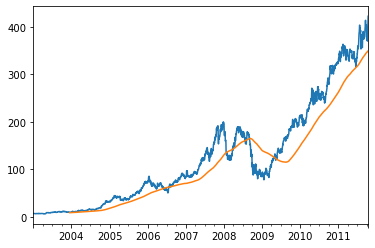

In [125]:
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()
close_px.AAPL.plot()
# rolling算子可以在Series或DataFrame上通过一个window进行调用
close_px.AAPL.rolling(250).mean().plot()
# rolling(250)和groupby类似，创建的对象是根据250日的滑动窗口分组的为不是直接分组

In [128]:
# 滚动函数需要窗口中所有的值都必须是非NA的值，在窗口的起始位置拥有的数据是少于窗口区间的
aapl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
aapl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

<AxesSubplot:>

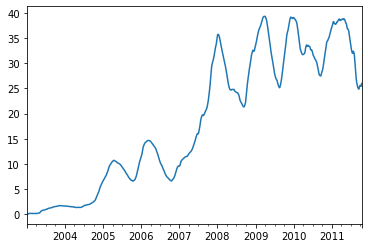

In [129]:
aapl_std250.plot()

<AxesSubplot:>

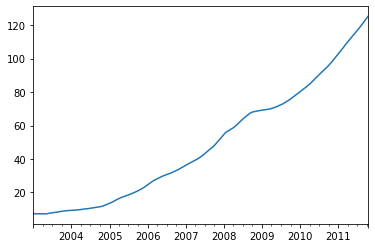

In [131]:
# 为了计算扩展窗口平均值，使用expending算子替代rolling
# 扩展均值从时间序列的起始位置开始时间窗口，并增加窗口的大小，直到涵盖整个序列
expending_mean = close_px.AAPL.expanding().mean()
expending_mean.plot()

<AxesSubplot:>

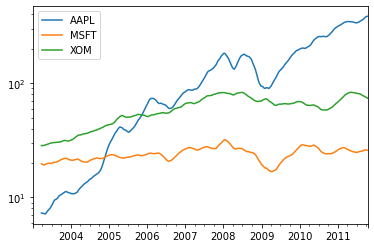

In [133]:
# 在DataFrame上调用移动窗口会将变换应用到每一列上
close_px.rolling(60).mean().plot(logy=True)

<AxesSubplot:>

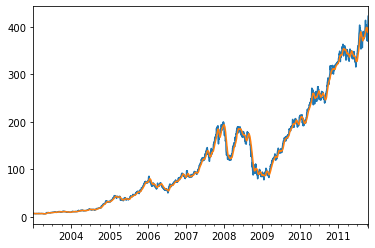

In [135]:
# rolling函数也可接收表示固定大小的时间偏置字符串
close_px.AAPL.plot()
close_px.AAPL.rolling('20D').mean().plot()

### 11.7.1 指数加权函数

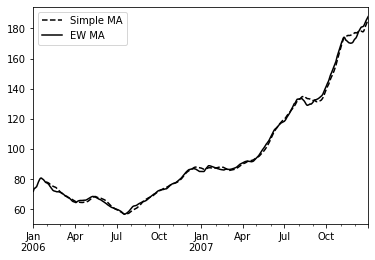

In [140]:
# 指定一个常数衰减因子以向更多近期观察值提供更多权重，其中一种流行的方式是使用一个span（跨度），这使得结果与窗口大小等于跨度的简单移动窗口函数。

# 将苹果公司股票价格的60日均线与span=60的EW移动平均线进行比较
import matplotlib.pyplot as plt
aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()
ma60.plot(style='k--',label='Simple MA')
ewma60.plot(style='k-',label='EW MA')
plt.legend()

### 11.7.2 二元移动窗口函数

<AxesSubplot:>

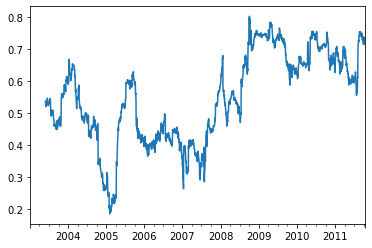

In [141]:
# 股票与标准指数的关联性
# 首先计算时间序列的百分比变化
spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()
# 计算滚动相关性
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

<AxesSubplot:>

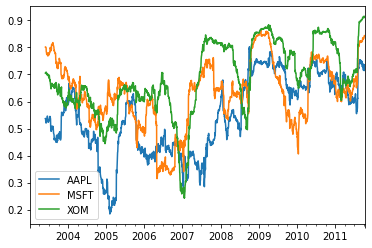

In [144]:
# 计算多个股票与标普500的相关性，就无需传入特定的列名
returns.rolling(125, min_periods=100).corr(spx_rets).plot()
#plt.legend('best')

### 11.7.3 使用自定义移动窗口函数

<AxesSubplot:>

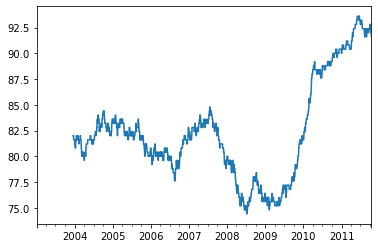

In [145]:
# 在rolling及其相关方法上使用apply方法提供一个在移动窗口中应用自己涉及的数组函数的方法。
# 唯一的要求是该函数从每个数组中产生一个单值（缩聚）。
# 例如可以调用rolling(...).quantile(q)来计算分位值，如果对样本特定值的百分位数感兴趣
# 可以使用scipy.stats.percentileofscore来实现
from scipy.stats import percentileofscore
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)
result.plot()